<a href="https://colab.research.google.com/github/nurdankar/Diffusion_Equation/blob/main/Diffusion_Equation_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving the Diffusion Equation in Python

We will solve the one-dimensional diffusion equation in two different coding forms. In the first form, we will be using very basic terms to grasp terminology. We will then take this one step further and use a Python function to describe the problem. This allows us to code more complex mathematical models in a useful way.

Now, we import required libraries. We will use NumPy and Matplotlib as in many mathematical process in Python.

> NumPy is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more. For more detail, click [NumPy](https://numpy.org/doc/stable/index.html).


> Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. For more detail, click [Matplotlib](https://matplotlib.org/).


In [1]:
"Import libraries"
import numpy as np
import matplotlib.pyplot as plt

## Diffusion equation in 1D
Let us take the one-dimensional diffusion equation $$\dfrac{\partial u}{\partial t}=D \dfrac{\partial^2 u}{\partial x^2},$$
with initial condition
$$u(x,0)=0,$$ 
and boundary conditions
$$u(0,t)=40,  u(L,t)=15.$$

To approximate the solution of this problem we will use forward-Euler method in this exercise. Forward-Euler method will be used for the first-order time derivative, and the central finite difference scheme will be used for the second order spatial derivative. It is known that the central difference scheme is a combination of the forward-difference and backward-difference of the first derivative. Thus, the discretized version of the one-dimensional diffusion equation can be written as

$$
\frac{u_i^{n+1}-u_i^{n}}{\Delta t} = D \bigg[\frac{-(u_{i}-u_{i-1})}{\Delta x^2} + \frac{(u_{i+1}-u_{i})}{\Delta x^2}\bigg] \quad  ...(1)
$$

when

$$
\frac{\partial u}{\partial t} = \frac{u_i^{n+1}-u_i^{n}}{\Delta t}
$$

and

$$
\frac{\partial^2 u}{\partial x^2} = \bigg[\frac{-(u_{i}-u_{i-1})}{\Delta x^2} + \frac{(u_{i+1}-u_{i})}{\Delta x^2}\bigg].
$$

From the equation (1), after some manipulation, we can write

$$u_i^{n+1} = u_i^n + \bigg[\frac{u_i^{n+1}-u_i^{n}}{\Delta t}\bigg]_t \Delta t. \quad ... (2)$$ 

Hence, we will code the equation (1) via a nested for loop, then call the equation (2) to obtain approximate solution.

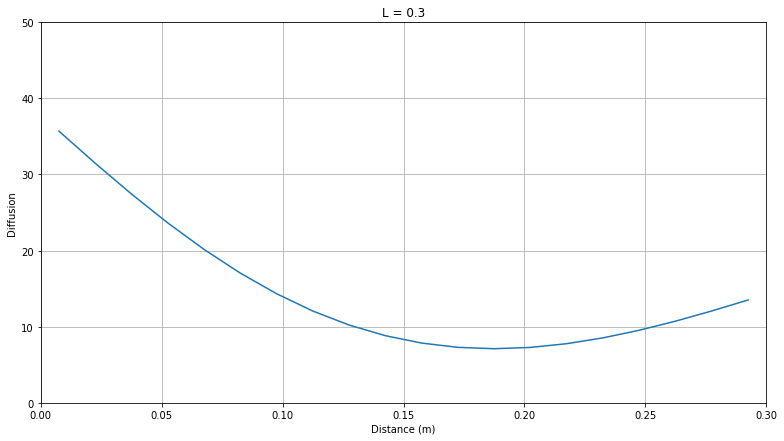

In [2]:
"Define the required variables"
L = 0.3                            #line 1: our one-dimensional spatial domain length(0.3m)
N = 20                             #line 2: the nodes; the grid points 
u0 = 0                             #line 3: the initial condition
u_l = 40                           #line 4: the left-side boundary condition
u_r = 15                           #line 5: the right-side boundary condition
dx = L/N                           #line 6: the length of each spatial subintervals 
D = 0.0001                         #line 7: the diffusion coefficient
u_f = 60                           #line 8: a stop point - we will use it to define "t" 
dt = 0.1                           #line 9: the amount of time each timestep covers - delta t

x = np.linspace(dx/2, L-dx/2, N)   #line 10: choose the start and stop points of the x-vector to plot - 
                                             #(middle point of first node (dx/2), middle point of last node (L-dx/2))
                                             #The code returns evenly spaced numbers over a specified interval (L).

u = np.ones(N) * u0                #line 11: starting diffusivity that contains the initial condition - 
                                             #a numpy array of N elements with all elements equal to 1 

dudt = np.empty(N)                 #line 12: initialise the solution - we will overwrite it
                                             #The code returns a new array of given shape and type, without initializing entries.

t = np.arange(0, u_f, dt)          #line 13: choose the start and stop points of the time vector to plot -
                                             #The code returns evenly spaced values within a given interval(0, u_f) with a defined step(dt=0.1).

un = np.ones(N)                    #line 14: a placeholder array

"Define the forward-Euler method for the diffusion equation"
for j in range(1, len(t)):                                                       #line 15: iterate through time                               
  un = u.copy()                                                                  #line 16: copy the existing values of u into un
  for i in range(1, N-1):                                                        #line 17: iterate through spatial nodes                                                    
    dudt[i] = D * (- (un[i] - un[i-1]) / dx ** 2 + (un[i+1] - un[i]) / dx ** 2)  #line 18: the forward-Euler method is generic for the interior nodes - see the equation (1)    
  dudt[0] = D * (- (un[0] - u_l) / dx ** 2 + (un[1] - u[0]) / dx**2)             #line 19: the node 0 has the left-side BC (u_l) on its left side; interacts with u_l - 
                                                                                           #no need to be in the loop becuase it is unique
  dudt[N-1] = D * (- (un[N-1] - un[N-2]) / dx ** 2 + (u_r - un[N-1]) / dx ** 2)  #line 20: the last node has the right-side BC (u_r) on its right side; interacts with u_r
  u = un + dudt * dt                                                             #line 21: it gives approximation the solution - see the equation (2)


"Plot the result"
plt.figure(figsize=(13, 7))         #line 22: required code to start plotting
plt.plot(x, u)                      #line 23: the main code to plot x and u
plt.axis([0, L, 0, 50])             #line 24: set axis properties(xmin, xmax, ymin, ymax)         
plt.xlabel('Distance (m)')          #line 25: name the x-axis
plt.ylabel('Diffusion')             #line 26: name the y-axis
plt.title('L = 0.3')                #line 27: name the graph
plt.grid()                          #line 28: plot with a grid - use "plt.show()" to plot without a grid 



To make x, t and u understandable, execute them on their own as follows.

In [3]:
x

array([0.0075, 0.0225, 0.0375, 0.0525, 0.0675, 0.0825, 0.0975, 0.1125,
       0.1275, 0.1425, 0.1575, 0.1725, 0.1875, 0.2025, 0.2175, 0.2325,
       0.2475, 0.2625, 0.2775, 0.2925])

In [4]:
t

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [5]:
u

array([35.69376597, 31.47605406, 27.43123207, 23.63574622, 20.15507218,
       17.04161437, 14.3336537 , 12.05530903, 10.21735851,  8.81868239,
        7.84804975,  7.28597906,  7.10645092,  7.27832723,  7.76641736,
        8.5322126 ,  9.53437021, 10.72906014, 12.07028822, 13.51028422])

##Implementation with Python functions
We will now code the same problem in a more useful manner. Thus, the diffusion problem can be easily extended by adding more complex features to the code structure below. Let us see if we can get the same graph as above.

In [6]:
"Class to solve 1D Diffusion equation"

class Diffusion():  
  
  def __init__(self, D=0.0001, N=20, dt=0.1, u_f=60, L=0.3, u_l=40, u_r=15, dx=0.1/20):  
    self.D = D                                                                                  
    self.N = N                         #__init__ function is called the objects(D, N, dt,...) is created from the class.                                                
    self.dt = dt                       #The "self" is used to access variables that belongs to the class.
    self.u_f = u_f                     #It has to be the first parameter of any function in the class.
    self.L = L            
    self.u_l = u_l         
    self.u_r = u_r
    self.t = np.arange(0, 60, 0.1)
    self.dx = self.L/self.N
    self.x = np.linspace(self.dx/2, self.L-self.dx/2, self.N)
    


  def initialise(self):                #set up the initial condition 
    self.u0 = 0 
    self.u = np.ones(self.N)*self.u0 
    self.un = np.ones(self.N)
    self.dudt = np.empty(self.N)
    


  def solve(self, D, t, u0, N, L):     #solve the diffusion problem using forward-Euler method
    for j in range(1, len(self.t)):
      self.un = self.u.copy()
      for i in range(1, self.N-1):                                                                          
        self.dudt[i] = D * (- (self.un[i] - self.un[i-1]) / self.dx ** 2 + (self.un[i+1] - self.un[i]) / self.dx ** 2)        
      self.dudt[0] = D * (- (self.un[0] - self.u_l) / self.dx ** 2 + (self.un[1] - self.un[0]) / self.dx ** 2)               
      self.dudt[N-1] = D * (- (self.un[N-1] - self.un[N-2]) / self.dx ** 2 + (self.u_r - self.un[N-1]) / self.dx ** 2)
      self.u = self.un + self.dudt * self.dt
    return self.u      

  def plot(self):                      #plot the result 
    plt.figure(figsize=(13,7))
    plt.plot(self.x, self.u, color = 'crimson', linewidth = '5')   #add color option and make the graph more visible
    plt.axis([0, self.L, 0, 50])              
    plt.xlabel('Distance (m)')
    plt.ylabel('Diffusion')
    plt.title('L = 0.3')
    plt.show()
         

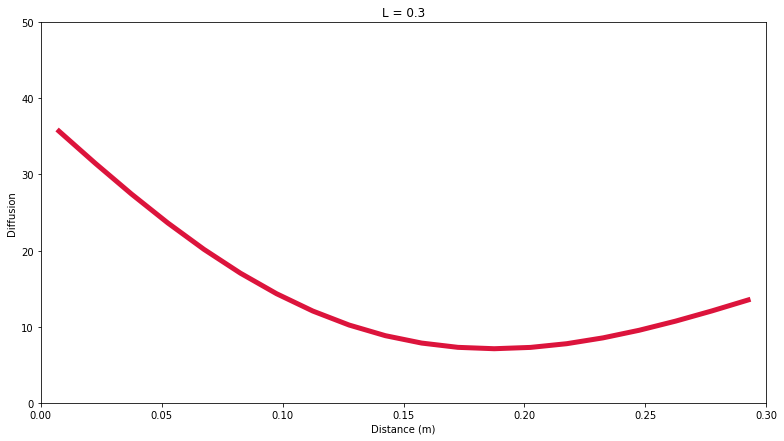

In [7]:
"Getting outputs "
dSolver = Diffusion() 
D, u0, N, L = 0.0001, 0, 20, 0.3
t = np.arange(0, 60, 0.1)

dSolver.initialise()                  #call the defined function in the previous cell
dSolver.solve(D, t, u0, N, L)         #             "
dSolver.plot() 